<a href="https://colab.research.google.com/github/dahlia52/ESAA_YB/blob/main/Project/YB_team1_project3_credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**월간 데이콘 신용카드 사기 거래 탐지 AI 경진대회**

https://dacon.io/competitions/official/235930/overview/rules

## Import

In [ ]:
import pandas as pd
import numpy as np

from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Load

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/DATA/train.csv') # Train
train_df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,6,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,8,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,9,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901


In [ ]:
val_df = pd.read_csv('/content/drive/MyDrive/DATA/val.csv') # Validation
val_df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,10,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878,0
1,22,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,...,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784,0
2,63,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,...,-0.119703,-0.076510,0.691320,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502,0
3,69,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,...,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,0.331307,-0.994467,0
4,83,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,-0.287012,-0.994373,0


## Train/Validation Feature 분포 확인

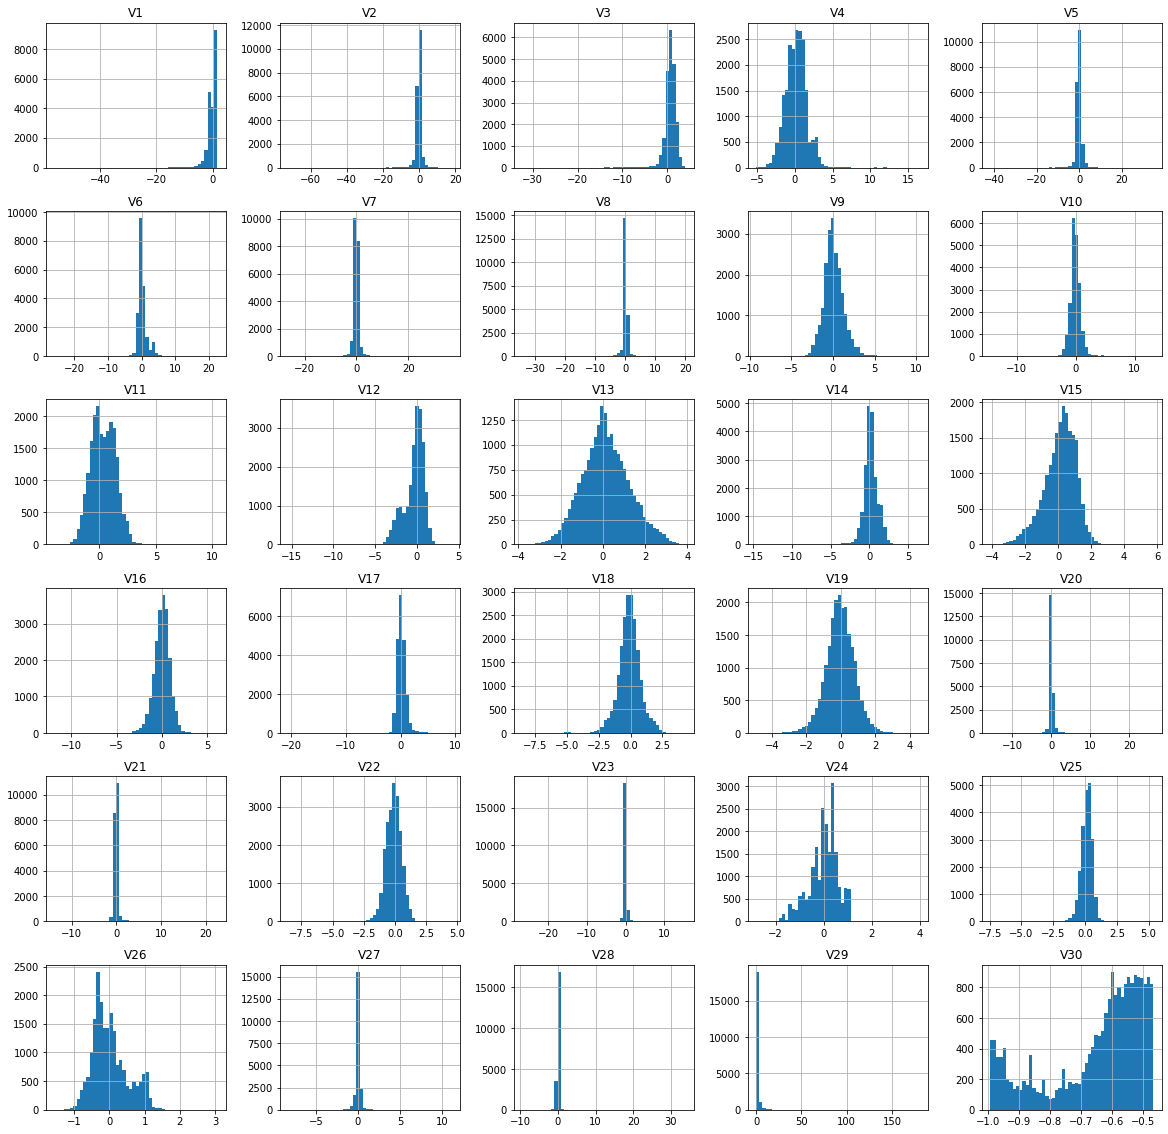

In [ ]:
train_df.drop(columns=['ID']).hist(bins = 50, figsize = (20,20))
plt.show()

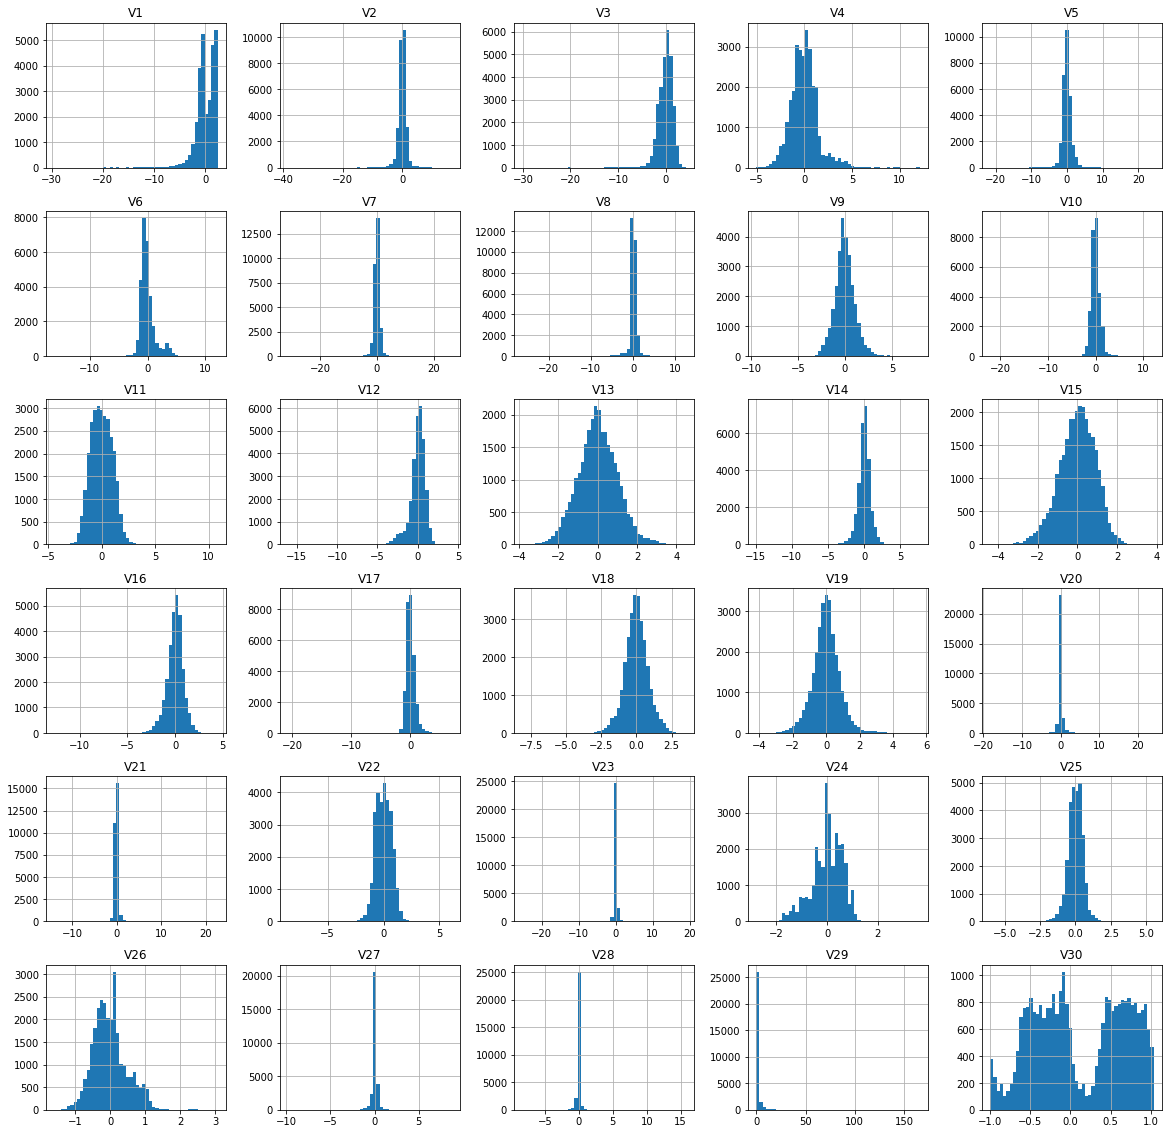

In [ ]:
val_df.drop(columns=['ID', 'Class']).hist(bins = 50, figsize = (20,20))
plt.show()

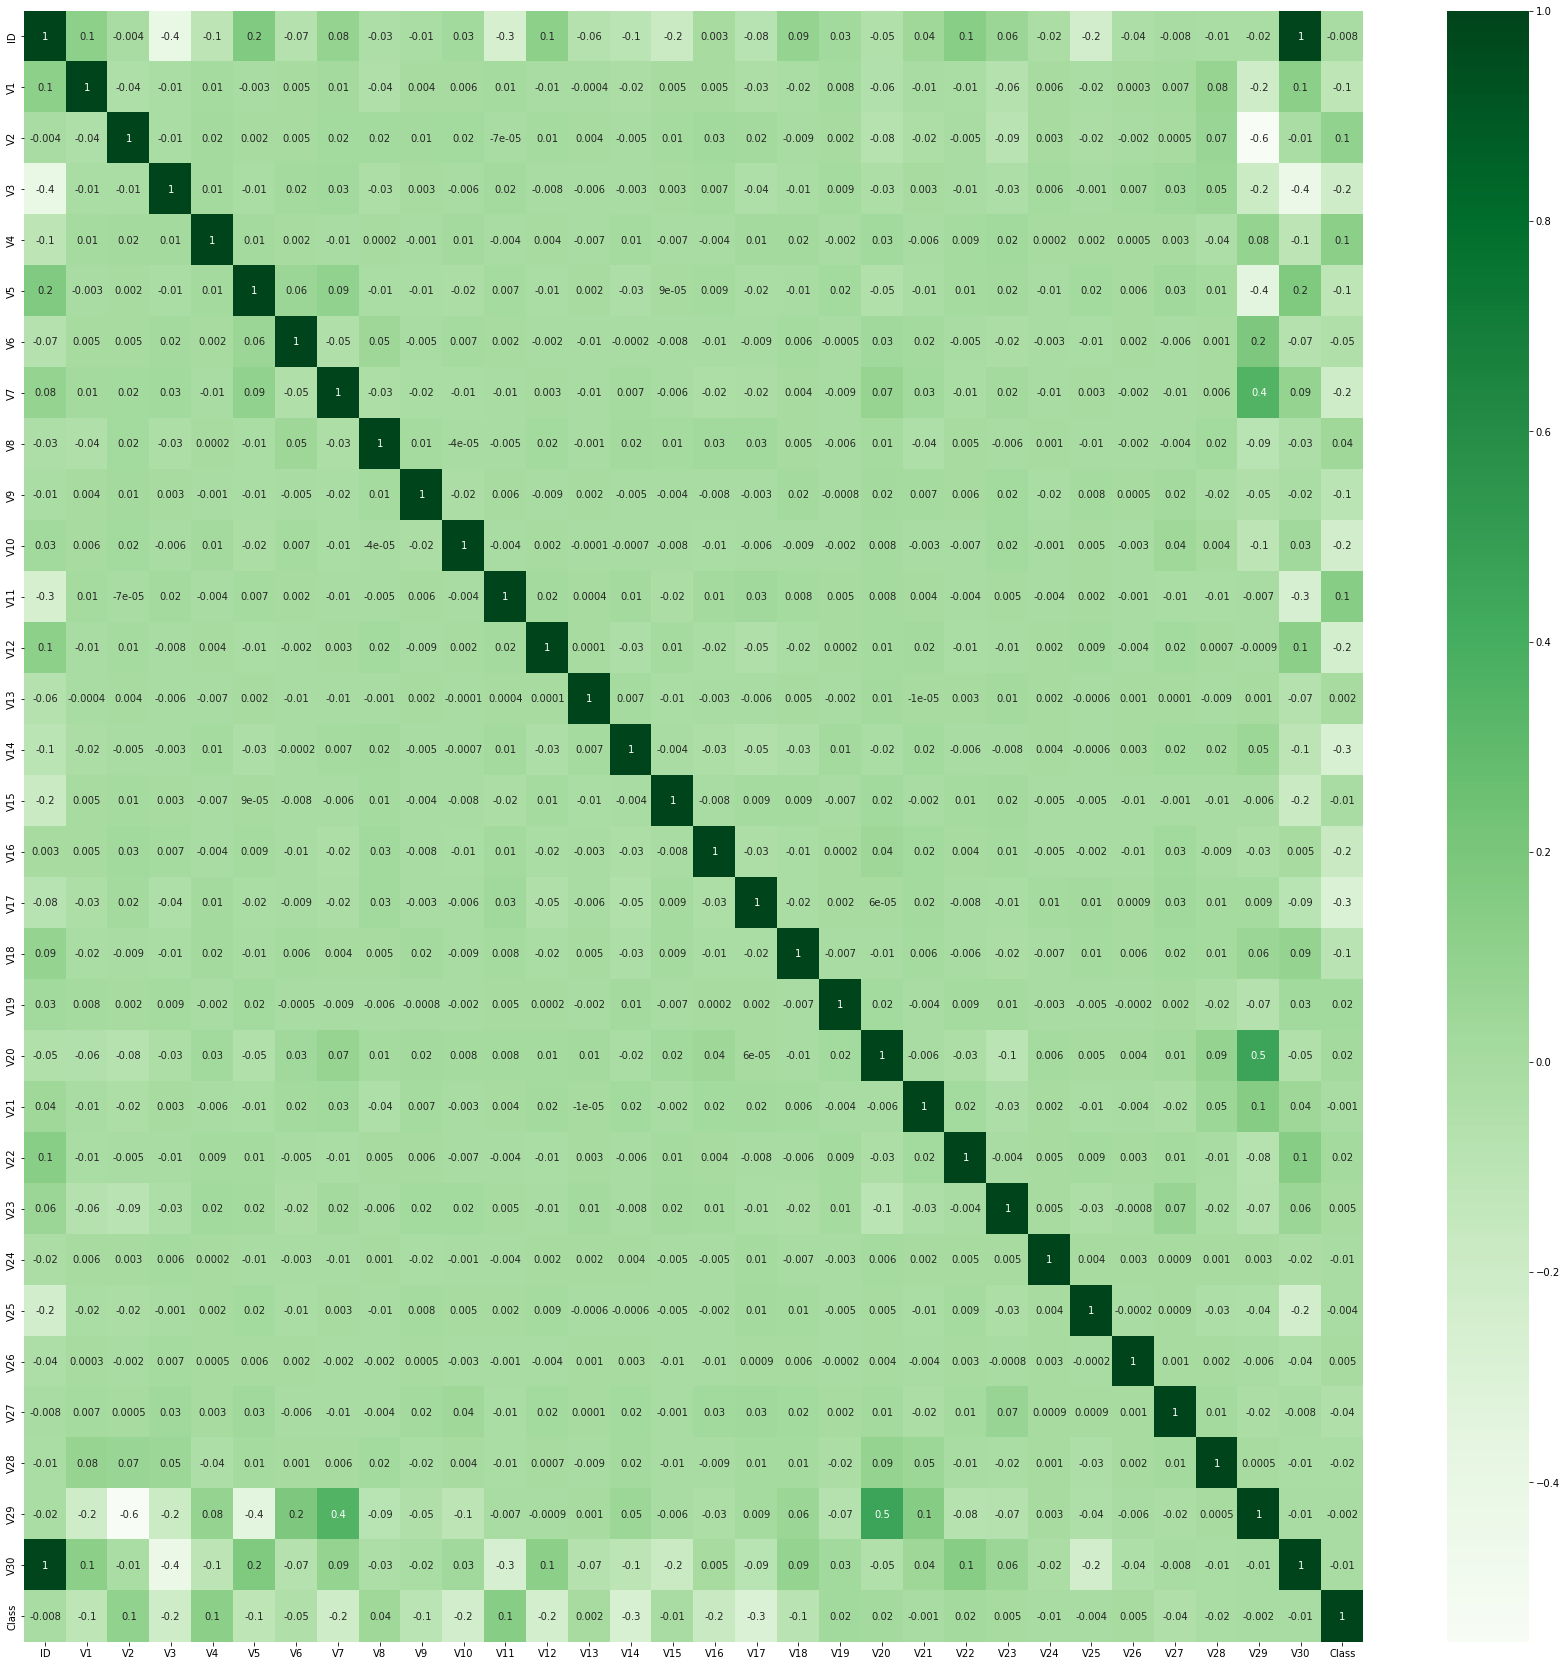

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = val_df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True, cmap = 'Greens', fmt='.1g')

In [ ]:
print(corr)

             ID        V1        V2        V3        V4        V5        V6  \
ID     1.000000  0.118766 -0.004260 -0.401006 -0.103958  0.167645 -0.066349   
V1     0.118766  1.000000 -0.038475 -0.014799  0.011677 -0.002571  0.004865   
V2    -0.004260 -0.038475  1.000000 -0.012623  0.016345  0.002036  0.004739   
V3    -0.401006 -0.014799 -0.012623  1.000000  0.014576 -0.012741  0.016019   
V4    -0.103958  0.011677  0.016345  0.014576  1.000000  0.013701  0.001960   
V5     0.167645 -0.002571  0.002036 -0.012741  0.013701  1.000000  0.055214   
V6    -0.066349  0.004865  0.004739  0.016019  0.001960  0.055214  1.000000   
V7     0.084468  0.013540  0.018912  0.028041 -0.009758  0.091640 -0.045892   
V8    -0.032119 -0.044240  0.024011 -0.028748  0.000173 -0.014929  0.046400   
V9    -0.012795  0.003845  0.013742  0.003331 -0.001150 -0.014733 -0.004506   
V10    0.026818  0.005688  0.019898 -0.006199  0.014927 -0.020577  0.006566   
V11   -0.253039  0.011546 -0.000068  0.017994 -0.004

In [ ]:
train_df.drop(['V2', 'V6', 'V8', 'V9', 'V13', 'V15', 'V18', 'V19', 'V20', 'V21', 'V22','V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30'], axis=1, inplace=True)
val_df.drop(['V2', 'V6', 'V8', 'V9', 'V13', 'V15', 'V18', 'V19', 'V20', 'V21', 'V22','V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30'], axis=1, inplace=True)

## Validation set 사기 거래 비율
#### (*) Validation set의 사기 거래 비율이 다른 데이터집합에서도 비슷하게 발생할 것이라고 가정

In [ ]:
val_normal, val_fraud = val_df['Class'].value_counts()
val_contamination = val_fraud / val_normal
print(f'Validation contamination : [{val_contamination}]')

Validation contamination : [0.0010551491277433877]


## Model Define & Fit & Evaluation : Validation set

In [ ]:
# Train dataset은 Label이 존재하지 않음
train_x = train_df.drop(columns=['ID']) # Input Data

In [ ]:
val_x = val_df.drop('Class',axis = 1)
val_y = val_df['Class']

---
### Isolation Forest





In [ ]:
model = IsolationForest(random_state = 0)

#### 1) 하이퍼 파라미터

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_features' : [5,10,15,20,25,30],
    'max_samples' : [len(train_x)],
    'n_estimators' : [50,75,100,125,150],
    'warm_start' : [True,False],
    'contamination' : [val_contamination],
    'bootstrap' : [True,False]
}

gridcv = GridSearchCV(model,param_grid = parameters, scoring = 'f1_macro', cv = 5)
gridcv.fit(val_x,val_y)
print('GridSearchCV 최적 하이퍼 파라미터 :', gridcv.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(gridcv.best_score_))
best_est = gridcv.best_estimator_

#### 2) 데이터 정규화

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

train_norm_x = MinMaxScaler().fit_transform(train_x)
train_std_x = StandardScaler().fit_transform(train_x)

val_norm_x = MinMaxScaler().fit_transform(val_x)
val_std_x = StandardScaler().fit_transform(val_x)

#### 3) 모델 학습 및 평가


In [ ]:
def get_pred_label(model_pred):
    # IsolationForest 모델 출력 (1:정상, -1:불량(사기)) 이므로 (0:정상, 1:불량(사기))로 Label 변환
    model_pred = np.where(model_pred == 1, 0, model_pred)
    model_pred = np.where(model_pred == -1, 1, model_pred)
    return model_pred

* 기존 데이터

In [ ]:
model = IsolationForest(random_state = 0,contamination = val_contamination, max_samples = 113842,max_features=5,n_estimators =50,warm_start = True,bootstrap = True)

In [ ]:
model.fit(train_x)

In [ ]:
val_x = val_df.drop(columns=['ID', 'Class']) # Input Data
val_y = val_df['Class'] # Label

val_pred = model.predict(val_x) # model prediction

val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, val_pred))

* 정규화 데이터

In [ ]:
model_norm = IsolationForest(random_state = 0,contamination = val_contamination, max_samples = 113842,max_features=5,n_estimators =50,warm_start = True,bootstrap = True)

In [ ]:
model_norm.fit(train_norm_x)

IsolationForest(bootstrap=True, contamination=0.0010551491277433877,
                max_features=5, max_samples=113842, n_estimators=50,
                random_state=0, warm_start=True)

In [ ]:
val_norm_x = val_norm_x[:,1:]
val_pred = model.predict(val_norm_x) # model prediction

val_pred = model.predict(val_norm_x) # model prediction

val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, val_pred))

Validation F1 Score : [0.4997363518121419]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.00      0.00      0.00        30

    accuracy                           1.00     28462
   macro avg       0.50      0.50      0.50     28462
weighted avg       1.00      1.00      1.00     28462



* 표준화 데이터

In [ ]:
model_std = IsolationForest(random_state = 0,contamination = val_contamination, max_samples = 113842,max_features=5,n_estimators =50,warm_start = True,bootstrap = True)

In [ ]:
model_std.fit(train_std_x)

IsolationForest(bootstrap=True, contamination=0.0010551491277433877,
                max_features=5, max_samples=113842, n_estimators=50,
                random_state=0, warm_start=True)

In [ ]:
val_std_x = val_std_x[:,1:]
val_pred = model.predict(val_std_x) # model prediction

val_pred = model.predict(val_std_x) # model prediction

val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, val_pred))

Validation F1 Score : [0.6968049303330581]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.34      0.47      0.39        30

    accuracy                           1.00     28462
   macro avg       0.67      0.73      0.70     28462
weighted avg       1.00      1.00      1.00     28462



#### 4) 오버 샘플링 SMOTE 적용



In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 0)
val_x_over,val_y_over = smote.fit_resample(val_x,val_y)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ',val_x.shape,val_y.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : ',val_x_over.shape,val_y_over.shape)
print('SMOTE 적용 후 레이블 값 분포 : \n',pd.Series(val_y_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 :  (28462, 30) (28462,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :  (56864, 30) (56864,)
SMOTE 적용 후 레이블 값 분포 : 
 0    28432
1    28432
Name: Class, dtype: int64


In [ ]:
model_smote = IsolationForest(random_state = 0,contamination = val_contamination, max_samples = 113842,max_features=5,n_estimators =50,warm_start = True,bootstrap = True)

In [ ]:
model_smote.fit(train_std_x)

IsolationForest(bootstrap=True, contamination=0.0010551491277433877,
                max_features=5, max_samples=113842, n_estimators=50,
                random_state=0, warm_start=True)

In [ ]:
val_pred = model_smote.predict(val_x_over)
val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y_over, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y_over, val_pred))

Validation F1 Score : [0.6574282572719354]
              precision    recall  f1-score   support

           0       0.62      1.00      0.76     28432
           1       1.00      0.38      0.55     28432

    accuracy                           0.69     56864
   macro avg       0.81      0.69      0.66     56864
weighted avg       0.81      0.69      0.66     56864



In [ ]:
val_pred = model.predict(val_x_over) # model prediction

val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y_over, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y_over, val_pred))

Validation F1 Score : [0.6595552137256689]
              precision    recall  f1-score   support

           0       0.62      1.00      0.76     28432
           1       1.00      0.38      0.55     28432

    accuracy                           0.69     56864
   macro avg       0.81      0.69      0.66     56864
weighted avg       0.81      0.69      0.66     56864



#### 5) 언더 샘플링


In [ ]:
from imblearn.under_sampling import NearMiss

nearmiss=NearMiss()
val_x_under,val_y_under = nearmiss.fit_resample(val_x,val_y)

In [ ]:
model_under = IsolationForest(random_state = 0,contamination = val_contamination, max_samples = 113842,max_features=5,n_estimators =50,warm_start = True,bootstrap = True)

In [ ]:
model_under.fit(train_std_x)

IsolationForest(bootstrap=True, contamination=0.0010551491277433877,
                max_features=5, max_samples=113842, n_estimators=50,
                random_state=0, warm_start=True)

In [ ]:
#val_x_under = val_x_under[:,1:]
val_pred = model_under.predict(val_x_under)
val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y_under, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y_under, val_pred))

Validation F1 Score : [0.6919359710057384]
              precision    recall  f1-score   support

           0       0.64      1.00      0.78        30
           1       1.00      0.43      0.60        30

    accuracy                           0.72        60
   macro avg       0.82      0.72      0.69        60
weighted avg       0.82      0.72      0.69        60



## Inference : Test set

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/DATA/test.csv') # Train
test_df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,AAAA0x1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,-0.994983
1,AAAA0x2,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,-0.994983
2,AAAA0x5,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,-0.994960
3,AAAA0x7,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.237686,-0.994937
4,AAAA0xc,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,-0.167819,-0.994866


In [ ]:
test_df.drop(['V2', 'V6', 'V8', 'V9', 'V13', 'V15', 'V18', 'V19', 'V20', 'V21', 'V22','V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30'], axis=1, inplace=True)

In [ ]:
test_x = test_df.drop(columns=['ID'])

---
### Isolation Forest

- test_std_x : 0.66857
- test_x : 0.67793

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
test_std_x = std.fit(train_x)
test_std_x = test_std_x.transform(test_x)

In [ ]:
test_pred_std = model.predict(test_std_x) # model prediction
test_pred_std = get_pred_label(test_pred_std)

In [ ]:
test_pred = model.predict(test_x)
test_pred = get_pred_label(test_pred)

## Local Outlier Factor

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=2, novelty=True, contamination=val_contamination)

1) 정규화

In [ ]:
clf.fit(train_norm_x)

LocalOutlierFactor(contamination=0.0010551491277433877, n_neighbors=2,
                   novelty=True)

In [ ]:
val_pred = clf.predict(val_norm_x) # model prediction
val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, val_pred))

Validation F1 Score : [0.4989613773192973]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.00      0.00      0.00        30

    accuracy                           1.00     28462
   macro avg       0.50      0.50      0.50     28462
weighted avg       1.00      1.00      1.00     28462



2) 표준화



In [ ]:
clf.fit(train_std_x)

LocalOutlierFactor(contamination=0.0010551491277433877, n_neighbors=2,
                   novelty=True)

In [ ]:
val_pred = clf.predict(val_std_x) # model prediction
val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, val_pred))

Validation F1 Score : [0.49908482928546294]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.00      0.00      0.00        30

    accuracy                           1.00     28462
   macro avg       0.50      0.50      0.50     28462
weighted avg       1.00      1.00      1.00     28462



3) 언더샘플링

In [ ]:
# 언더 샘플링 
from imblearn.under_sampling import NearMiss

nearmiss=NearMiss()
val_x_under,val_y_under = nearmiss.fit_resample(val_norm_x,val_y)

In [ ]:
clf.fit(train_norm_x)

LocalOutlierFactor(contamination=0.0010551491277433877, n_neighbors=2,
                   novelty=True)

In [ ]:
val_pred = clf.predict(val_x_under)
val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y_under, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y_under, val_pred))

Validation F1 Score : [0.3258426966292135]
              precision    recall  f1-score   support

           0       0.49      0.97      0.65        30
           1       0.00      0.00      0.00        30

    accuracy                           0.48        60
   macro avg       0.25      0.48      0.33        60
weighted avg       0.25      0.48      0.33        60



In [ ]:
clf.fit(train_std_x)

LocalOutlierFactor(contamination=0.0010551491277433877, n_neighbors=2,
                   novelty=True)

In [ ]:
val_pred = clf.predict(val_x_under)
val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y_under, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y_under, val_pred))

Validation F1 Score : [0.3333333333333333]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        30
           1       0.00      0.00      0.00        30

    accuracy                           0.50        60
   macro avg       0.25      0.50      0.33        60
weighted avg       0.25      0.50      0.33        60



4) 오버샘플링

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 0)
val_x_over,val_y_over = smote.fit_resample(val_norm_x,val_y)

In [ ]:
clf.fit(train_norm_x)

LocalOutlierFactor(contamination=0.0010551491277433877, n_neighbors=2,
                   novelty=True)

In [ ]:
val_pred = clf.predict(val_x_over)
val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y_over, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y_over, val_pred))

Validation F1 Score : [0.33927379118244333]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     28432
           1       0.66      0.01      0.01     28432

    accuracy                           0.50     56864
   macro avg       0.58      0.50      0.34     56864
weighted avg       0.58      0.50      0.34     56864



In [ ]:
clf.fit(train_std_x)

In [ ]:
val_pred = clf.predict(val_x_over)
val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y_over, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y_over, val_pred))

Validation F1 Score : [0.3333333333333333]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     28432
           1       0.00      0.00      0.00     28432

    accuracy                           0.50     56864
   macro avg       0.25      0.50      0.33     56864
weighted avg       0.25      0.50      0.33     56864



## One Class SVM

In [ ]:
from sklearn.svm import OneClassSVM

svm = OneClassSVM(kernel = 'linear', nu = val_contamination)

1) 데이터 정규화

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

train_norm = MinMaxScaler().fit_transform(train)
train_std = StandardScaler().fit_transform(train)

val_x_std = StandardScaler().fit_transform(val_x)
val_x_norm = MinMaxScaler().fit_transform(val_x)

2) 모델 학습 및 평가

- 기존 데이터

validation 데이터로 테스트 결과 f1 score: 0.47474486500452145

In [ ]:
svm.fit(train)
val_pred = svm.predict(val_x) # model prediction

val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, val_pred))

- 정규화 데이터

validation 데이터로 테스트 결과 f1 score: 0.6147437219615325

In [ ]:
svm.fit(train_norm)
val_pred_norm = svm.predict(val_x_norm)

val_pred_norm = get_pred_label(val_pred_norm)
val_score_norm = f1_score(val_y, val_pred_norm, average='macro')
print(f'Validation F1 Score : [{val_score_norm}]')
print(classification_report(val_y, val_pred_norm))

- 표준화 데이터

validation 데이터로 테스트 결과 f1 score: 0.15629963519779244

In [ ]:
svm.fit(train_std)
val_pred_std = svm.predict(val_x_std)

val_pred_std = get_pred_label(val_pred_std)
val_score_std = f1_score(val_y, val_pred_std, average='macro')
print(f'Validation F1 Score : [{val_score_std}]')
print(classification_report(val_y, val_pred_std))

3) 오버 샘플링 SMOTE 적용

validation 데이터로 테스트 결과 f1 score: 0.7885419596345324

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

smote = SMOTE(random_state = 0)
val_x_over,val_y_over = smote.fit_resample(val_x_norm,val_y)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ',val_x.shape,val_y.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : ',val_x_over.shape,val_y_over.shape)
print('SMOTE 적용 후 레이블 값 분포 : \n',val_y_over['Class'].value_counts())

In [ ]:
svm_smote = OneClassSVM(kernel = 'linear', nu = val_contamination)
svm_smote.fit(train_norm)

val_pred = svm_smote.predict(val_x_over)
val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y_over, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y_over, val_pred))

4) 언더 샘플링

validation 데이터로 테스트 결과 f1 score: 0.8102903133084219

In [ ]:
from imblearn.under_sampling import NearMiss

nearmiss=NearMiss()
val_x_under,val_y_under = nearmiss.fit_resample(val_std_x,val_y)

In [ ]:
svm_under = OneClassSVM(kernel = 'linear', nu = val_contamination)
svm_under.fit(train_norm)

val_pred = svm_under.predict(val_x_under)
val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y_under, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y_under, val_pred))

5) Submission

f1 score : 0.5333628661

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Data/credit/test.csv')
test.drop(['ID'],axis=1,inplace=True)

test_norm = MinMaxScaler().fit_transform(test)
test_std = StandardScaler().fit_transform(test)

In [ ]:
test_pred = svm_under.predict(test_norm)
test_pred = get_pred_label(test_pred)

In [ ]:
np.unique(test_pred,return_counts=True)

In [ ]:
submit = pd.read_csv('/content/drive/MyDrive/Data/credit/sample_submission.csv')
submit['Class'] = test_pred
submit.to_csv('/content/drive/MyDrive/Data/credit/submit.csv', index=False)

# EllipticEnvelope

기존 데이터 사용

In [ ]:
from sklearn.covariance import EllipticEnvelope
env = EllipticEnvelope(contamination=val_contamination, random_state=11)

In [ ]:
env.fit(train_x)
val_pred = env.predict(val_x)
val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, val_pred))

Validation F1 Score : [0.49952523298751533]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.00      0.00      0.00        30

    accuracy                           1.00     28462
   macro avg       0.50      0.50      0.50     28462
weighted avg       1.00      1.00      1.00     28462



### 1) 정규화

f1 score : 0.7021182406967202

In [ ]:
from sklearn.covariance import EllipticEnvelope
env = EllipticEnvelope(contamination=val_contamination, random_state=11)

In [ ]:
env.fit(train_norm_x)

EllipticEnvelope(contamination=0.0010551491277433877, random_state=11)

In [ ]:
val_pred = env.predict(val_norm_x)
val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, val_pred))

Validation F1 Score : [0.7021182406967202]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.33      0.53      0.41        30

    accuracy                           1.00     28462
   macro avg       0.66      0.77      0.70     28462
weighted avg       1.00      1.00      1.00     28462



###2) 표준화

f1 score : 0.4994636230941034

In [ ]:
env.fit(train_std_x)

EllipticEnvelope(contamination=0.0010551491277433877, random_state=11)

In [ ]:
val_pred = env.predict(val_std_x) # model prediction
val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, val_pred))

Validation F1 Score : [0.4994636230941034]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.00      0.00      0.00        30

    accuracy                           1.00     28462
   macro avg       0.50      0.50      0.50     28462
weighted avg       1.00      1.00      1.00     28462



5) Submission

f1 score : 0.8154203143

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/card_test.csv')
test.drop(['ID'],axis=1,inplace=True)

test_norm = MinMaxScaler().fit_transform(test)
test_std = StandardScaler().fit_transform(test)

In [ ]:
from sklearn.covariance import EllipticEnvelope
env = EllipticEnvelope(contamination=val_contamination, random_state=11)

In [ ]:
env.fit(train_norm_x)

EllipticEnvelope(contamination=0.0010551491277433877, random_state=11)

In [ ]:
test_pred = env.predict(test_norm)
test_pred = get_pred_label(test_pred)

In [ ]:
np.unique(test_pred,return_counts=True)

(array([0, 1]), array([142274,    229]))

In [ ]:
card_submit = pd.read_csv('/content/drive/MyDrive/card_sample_submission.csv')
card_submit['Class'] = test_pred
card_submit.to_csv('/content/drive/MyDrive/card_submit.csv', index=False)

## +) SGDOneClassSVM

### 1) 정규화 데이터

f1 score: 0.6829992027762146

In [ ]:
from sklearn import linear_model
svd = linear_model.SGDOneClassSVM(random_state=11,nu = val_contamination,)

In [ ]:
svd.fit(train_norm_x)

SGDOneClassSVM(nu=0.0010551491277433877, random_state=11)

In [ ]:
val_pred = svd.predict(val_norm_x)
val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, val_pred))

ValueError: ignored

## 2) 표준화 데이터

f1 score: 0.4997363518121419

In [ ]:
from sklearn import linear_model
svd = linear_model.SGDOneClassSVM(random_state=11,nu = val_contamination,)

In [ ]:
svd.fit(train_std_x)

SGDOneClassSVM(nu=0.0010551491277433877, random_state=11)

In [ ]:
val_pred = svd.predict(val_std_x)
val_pred = get_pred_label(val_pred)
val_score = f1_score(val_y, val_pred, average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(val_y, val_pred))

Validation F1 Score : [0.4997363518121419]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.00      0.00      0.00        30

    accuracy                           1.00     28462
   macro avg       0.50      0.50      0.50     28462
weighted avg       1.00      1.00      1.00     28462



5) Submission

f1 score : 제출 횟수 초과

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/card_test.csv')
test.drop(['ID'],axis=1,inplace=True)

test_norm = MinMaxScaler().fit_transform(test)
test_std = StandardScaler().fit_transform(test)

In [ ]:
from sklearn import linear_model
svd = linear_model.SGDOneClassSVM(random_state=11,nu = val_contamination,)

In [ ]:
svd.fit(train_norm_x)

SGDOneClassSVM(nu=0.0010551491277433877, random_state=11)

In [ ]:
val_pred = svd.predict(test_norm)
val_pred = get_pred_label(test_pred)

In [ ]:
np.unique(test_pred,return_counts=True)

(array([0, 1]), array([142274,    229]))

In [ ]:
card_submit = pd.read_csv('/content/drive/MyDrive/card_sample_submission.csv')
card_submit['Class'] = test_pred
card_submit.to_csv('/content/drive/MyDrive/card_submit_svd.csv', index=False)

## Submission

In [ ]:
submit = pd.read_csv('/content/drive/MyDrive/DATA/submit.csv')
submit.head()

,ID,Class
0,AAAA0x1,0
1,AAAA0x2,0
2,AAAA0x5,0
3,AAAA0x7,0
4,AAAA0xc,0


In [ ]:
submit['Class'] = test_pred
submit.to_csv('/content/drive/MyDrive/DATA/creditcard_submit.csv', index=False)